ดาวโหลดชุดข้อมูลผู้ป่วยโรคเบาหวานจาก kaggle และอัปโหลดเข้า colab

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# ขั้นตอนการ Clean Data

หา Missing Value และค่าที่ซ้ำซ้อน

In [ ]:
df.isnull().sum() #หา missing value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


ลบแถวข้อมูลที่ Glucose, BloodPressure, SkinThickness, Insulin, BMI มีค่าเป็น 0 เพราะค่าเหล่านี้ไม่สามารถเป็น 0 ได้ สังเกตได้จากค่า min

In [ ]:
rows_to_delete = df[(df.loc[:, 'Glucose':'BMI'] == 0).any(axis=1)]

ndf = df.drop(rows_to_delete.index)

In [ ]:
ndf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


นำ Outlier ออกจากข้อมูล เพื่อทำให้การเทรนโมเดลของเรามีคุณภาพมากขึ้น

In [ ]:
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def remove_outliers(ndf):
    outliers_indices = []
    for column in attributes:
        q1 = ndf[column].quantile(0.25)
        q3 = ndf[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr  # Increased multiplier from 1.5 to 2
        upper_bound = q3 + 1.5 * iqr  # Increased multiplier from 1.5 to 2
        outliers_indices.extend(ndf[(ndf[column] < lower_bound) | (ndf[column] > upper_bound)].index)
    return ndf.drop(outliers_indices)

ndf = remove_outliers(ndf)

In [ ]:
ndf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
19,1,115,70,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
748,3,187,70,22,200,36.4,0.408,36,1
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0


แสดงการกระจายตัวของกราฟ พบว่าเป็นการกระจายตัวแบบไม่ต่อเนื่อง

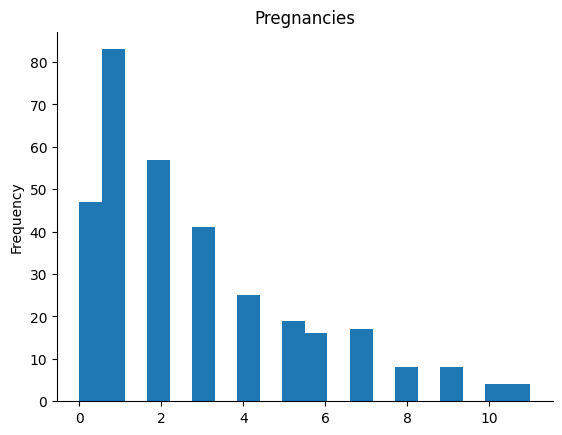

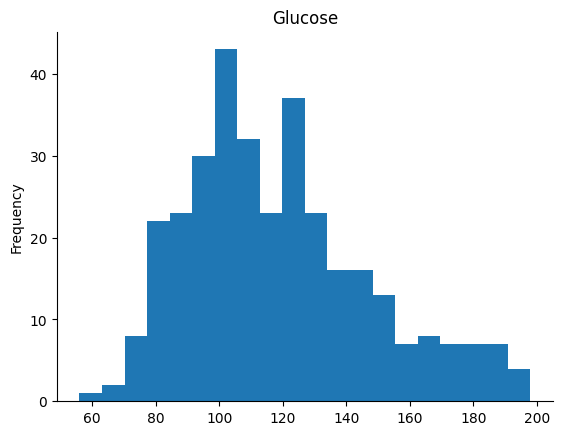

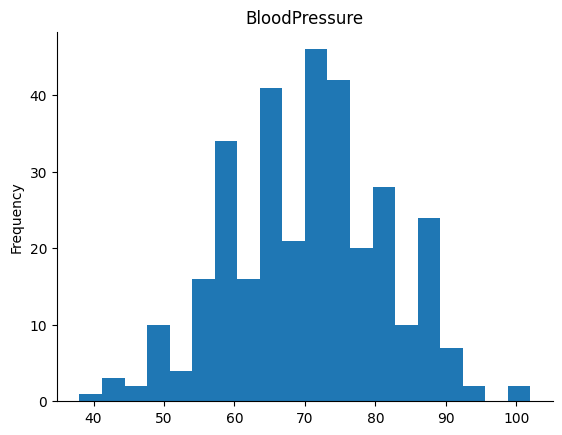

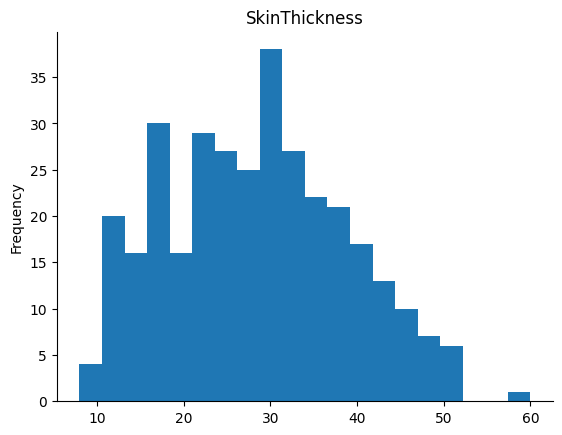

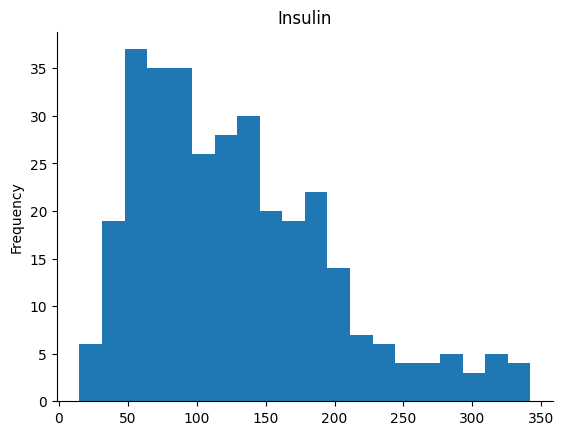

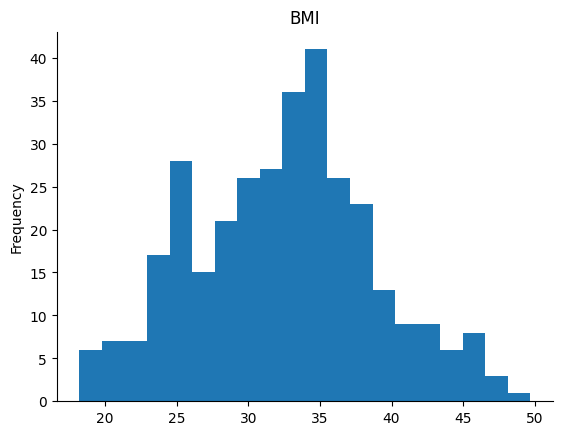

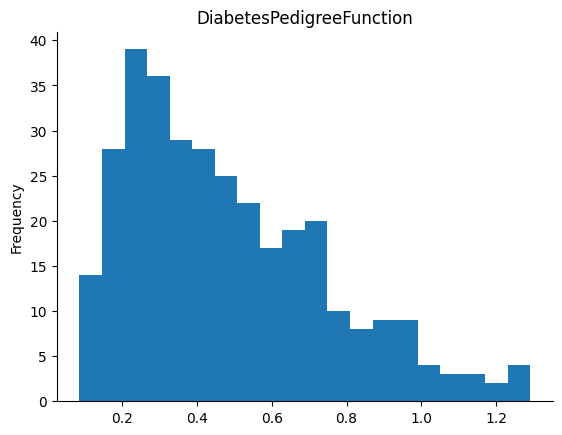

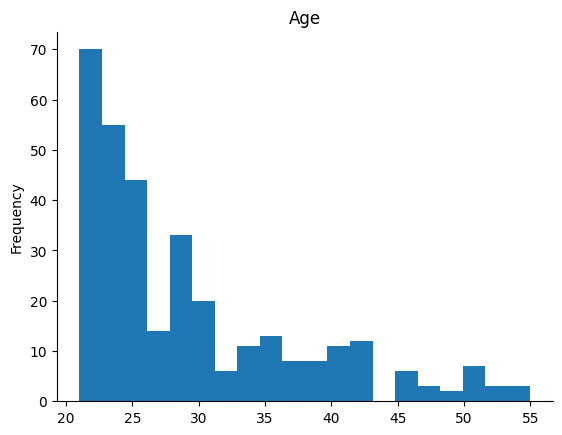

In [ ]:
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for attribute in attributes:
    plt.figure()
    ndf[attribute].plot(kind='hist', bins=20, title=attribute)
    plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()
print('\n')

**สร้างกราฟดูการกระจายตัวของข้อมูล เพื่อนำมาพิจารณาว่า attribute ใดเหมาะกับการสร้าง Model**

โดยกราฟเส้นเขียวคือกราฟการกระจายตัวของข้อมูลที่มี Outcome เท่ากับ 1

กราฟเส้นแดงคือกราฟการกระจายตัวของข้อมูลที่มี Outcome เท่ากับ 0

หากมีการซ้อนทับกันของกราฟมากแสดงว่า attribute นั้นมีค่า Outcome ที่ใกล้เคียงกันและแยกออกจากกันไม่ชัดเจน อาจไม่ใช่ตัวแปรสำคัญในการเทรนโมเดล

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

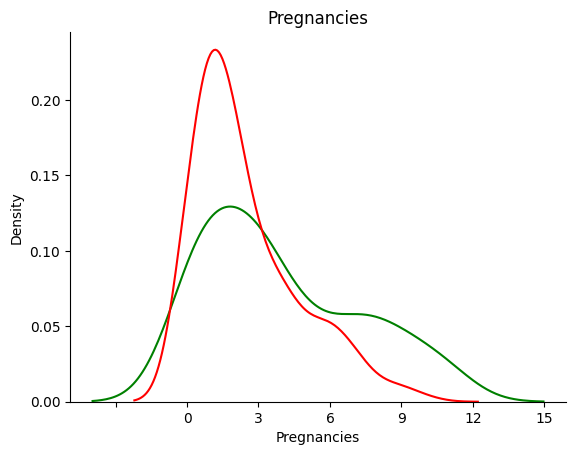

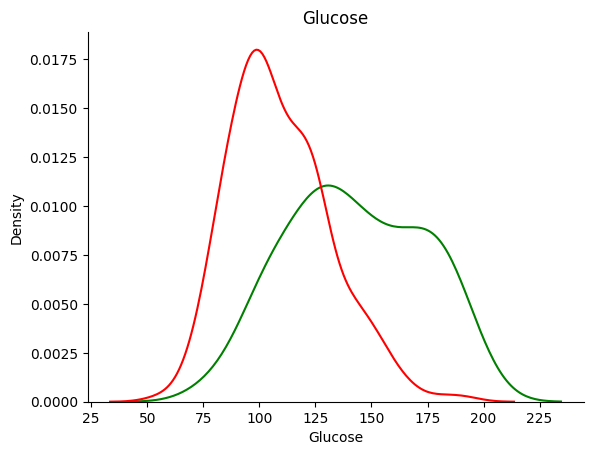

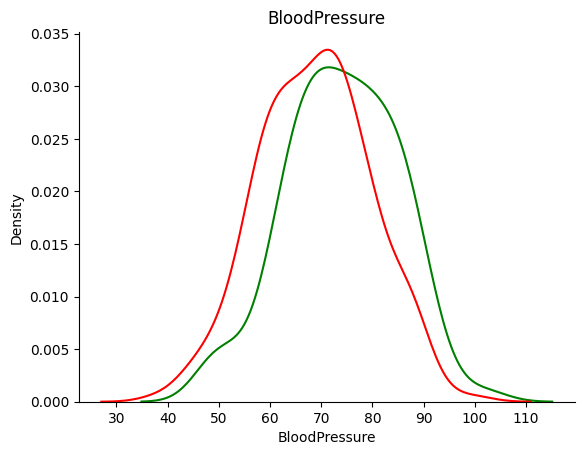

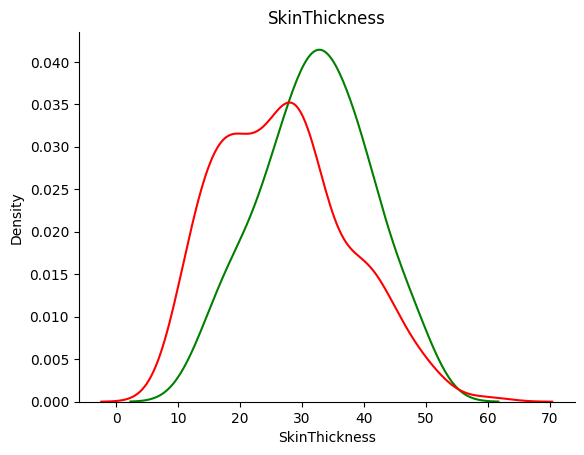

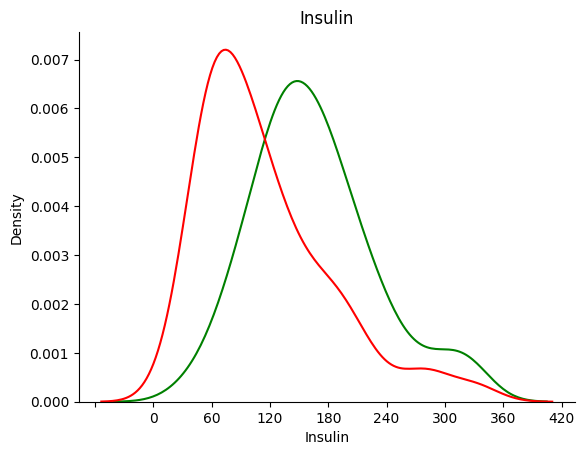

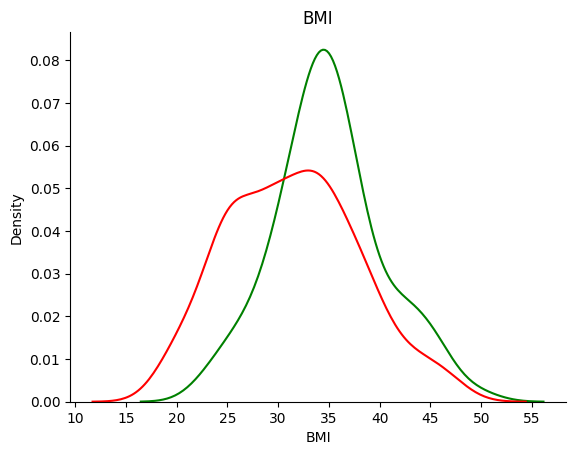

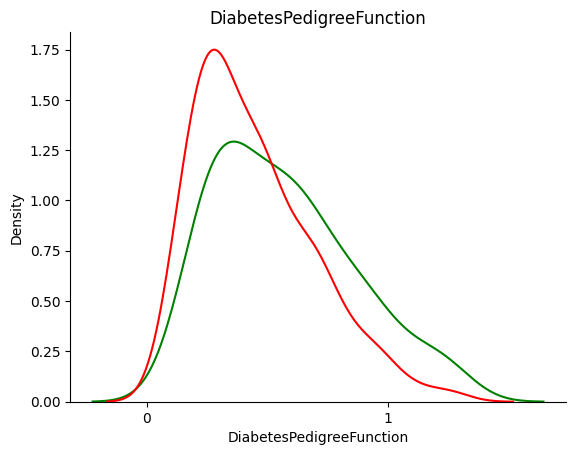

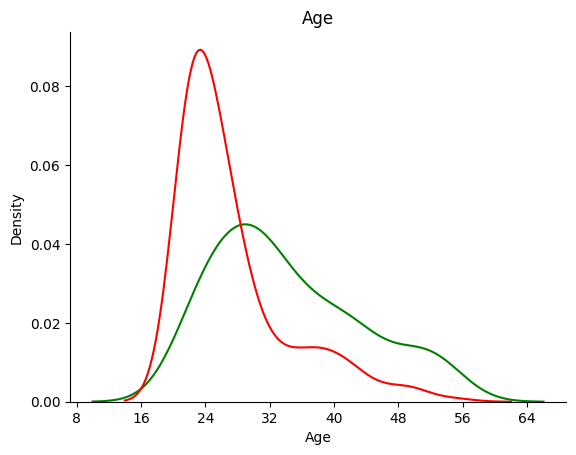



Sorted attributes by overlap area (from most to least overlap):
BloodPressure: 0.9305186427298835
DiabetesPedigreeFunction: 0.885630665225678
Pregnancies: 0.8832656669202379
BMI: 0.8468031271935499
Glucose: 0.7292576987934233
SkinThickness: 0.6551252289216565
Insulin: 0.6545499311844074
Age: 0.6046310458583423


In [ ]:
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def custom_formatter(x, pos):
    if x < 0:
        return ''
    else:
        return '{:.0f}'.format(x)

overlap_areas = []

for attribute in attributes:
    # Calculate KDE for outcome 1
    kde_outcome_1 = sns.kdeplot(ndf[ndf['Outcome'] == 1][attribute], color='green', label='Outcome 1', legend=False)

    # Calculate KDE for outcome 0
    kde_outcome_0 = sns.kdeplot(ndf[ndf['Outcome'] == 0][attribute], color='red', label='Outcome 0', legend=False)

    # Get x and y values for both KDE curves
    x_outcome_1, y_outcome_1 = kde_outcome_1.get_lines()[0].get_data()
    x_outcome_0, y_outcome_0 = kde_outcome_0.get_lines()[1].get_data()

    # Calculate area of overlap
    overlap_area = np.trapz(np.minimum(y_outcome_1, y_outcome_0), x_outcome_1)
    overlap_areas.append((attribute, overlap_area))

    plt.title(attribute)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(custom_formatter))
    plt.show()
    print('\n')


# Sort attributes based on overlap area
overlap_areas.sort(key=lambda x: x[1], reverse=True)

# Print sorted attributes
print("Sorted attributes by overlap area (from most to least overlap):")
for attribute, overlap_area in overlap_areas:
    print(f"{attribute}: {overlap_area}")


# ขั้นตอนการ Training Model



ใช้คลาส GaussianNB ในการเทรนโมเดล




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

เริ่มต้นจากการใช้ทั้งหมด 8 attribute แสดงผลได้ดังนี้

In [ ]:
X1 = ndf.iloc[:, :8].values
y1 = ndf.iloc[:, -1].values

In [ ]:
X1, y1

(array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
        [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
        [  5.   , 166.   ,  72.   , ...,  25.8  ,   0.587,  51.   ],
        ...,
        [  1.   , 128.   ,  88.   , ...,  36.5  ,   1.057,  37.   ],
        [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]]),
 array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
len(X1)

329

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [ ]:
len(X1_train)

263

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
gnb1_pred = gnb.predict(X1_test)

In [ ]:
acc1_g = (y1_test == gnb1_pred).sum() / X1_test.shape[0]
print(acc1_g)

0.7424242424242424


In [ ]:
confusion_gnb = confusion_matrix( y1_test, gnb1_pred)
accuracy = accuracy_score(y1_test , gnb1_pred)
precision = precision_score(y1_test , gnb1_pred)
recall = recall_score(y1_test , gnb1_pred)
f1 = f1_score(y1_test,gnb1_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \
F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.7424, precision: 0.4348, recall: 0.7143, F1 score: 0.5405


Text(0.5, 1.0, 'Confusion Matrix GNB')

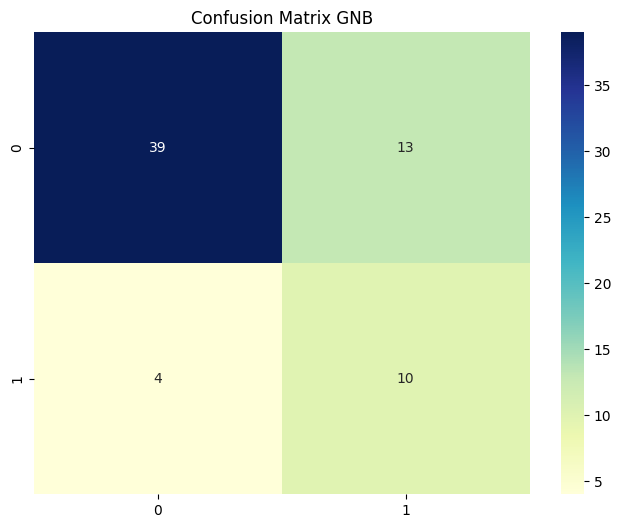

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_gnb, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix GNB')

ลองตัด attribute ทีละตัวที่ไม่สำคัญ 3 ลำดับแรกได้แก่ BloodPressure, DiabetesPedigreeFunction, Pregnancies ออกโดยการ input และดูค่า Accuracy

โดย number สามารถเป็น list ได้ดังนี้

[0, 1, 3, 4, 5, 6, 7]

[0, 1, 3, 4, 5, 7]

[1, 3, 4, 5, 7]

In [ ]:
numbers = []
n = int(input("How many numbers: "))

for i in range(n):
    num = int(input("Enter number: "))
    numbers.append(num)

X2 = ndf.iloc[:, numbers].values
y2 = ndf.iloc[:, -1].values

How many numbers: 7
Enter number: 0
Enter number: 1
Enter number: 3
Enter number: 4
Enter number: 5
Enter number: 6
Enter number: 7


In [ ]:
X2, y2

(array([[  1.   ,  89.   ,  23.   , ...,  28.1  ,   0.167,  21.   ],
        [  3.   ,  78.   ,  32.   , ...,  31.   ,   0.248,  26.   ],
        [  5.   , 166.   ,  19.   , ...,  25.8  ,   0.587,  51.   ],
        ...,
        [  1.   , 128.   ,  39.   , ...,  36.5  ,   1.057,  37.   ],
        [  2.   ,  88.   ,  26.   , ...,  28.4  ,   0.766,  22.   ],
        [  5.   , 121.   ,  23.   , ...,  26.2  ,   0.245,  30.   ]]),
 array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=0)

In [ ]:
gnb.fit(X2_train, y2_train)

GaussianNB()

In [ ]:
gnb2_pred = gnb.predict(X2_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X2_test.shape[0], (y2_test != gnb2_pred).sum()))

Number of mislabeled points out of a total 66 points : 16


In [ ]:
acc2_g = (y2_test == gnb2_pred).sum() / X2_test.shape[0]
print(acc2_g)

0.7575757575757576


ลองใช้ชุดข้อมูลที่แตกต่าง จากที่ใช้ train 80% เป็นใช้ 70%

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size=0.30, random_state=0)

In [ ]:
gnb.fit(X3_train, y3_train)

GaussianNB()

In [ ]:
gnb3_pred = gnb.predict(X3_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X3_test.shape[0], (y3_test != gnb3_pred).sum()))

Number of mislabeled points out of a total 99 points : 22


In [ ]:
acc3_g = (y3_test == gnb3_pred).sum() / X3_test.shape[0]
print(acc3_g)

0.7777777777777778


--------------------------------------------------------------------------------

ใช้คลาส BernoulliNB ในการเทรนโมเดล

ทำขั้นตอนเหมือนคลาสก่อนหน้าคือ

1. ใช้ 8 attribute
2.ลองตัดทีละ attribute
3.ใช้ชุดข้อมูลในการเทรนที่แตกต่างกัน

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB()

In [ ]:
bnb.fit(X1_train, y1_train)

BernoulliNB()

In [ ]:
bnb1_pred = bnb.predict(X1_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X1_test.shape[0], (y1_test != bnb1_pred).sum()))

Number of mislabeled points out of a total 66 points : 14


In [ ]:
acc1_b = (y1_test == bnb1_pred).sum() / X1_test.shape[0]
print(acc1_b)

0.7878787878787878


In [ ]:
confusion_bnb = confusion_matrix( y1_test, bnb1_pred)
accuracy = accuracy_score(y1_test , bnb1_pred)
precision = precision_score(y1_test , bnb1_pred)
recall = recall_score(y1_test , bnb1_pred)
f1 = f1_score(y1_test, bnb1_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \
F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.7879, precision: 0.0000, recall: 0.0000, F1 score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(y1_test)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [ ]:
print(bnb1_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'Confusion Matrix BNB')

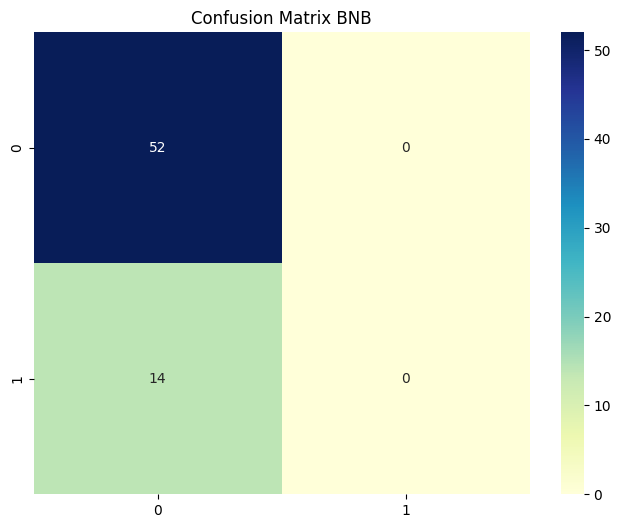

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_bnb, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix BNB')

In [ ]:
bnb.fit(X2_train, y2_train)

BernoulliNB()

In [ ]:
bnb2_pred = bnb.predict(X2_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X2_test.shape[0], (y2_test != bnb2_pred).sum()))

Number of mislabeled points out of a total 66 points : 14


In [ ]:
acc2_b = (y2_test == bnb2_pred).sum() / X2_test.shape[0]
print(acc2_b)

0.7878787878787878


In [ ]:
bnb.fit(X3_train, y3_train)

BernoulliNB()

In [ ]:
bnb3_pred = bnb.predict(X3_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X3_test.shape[0], (y3_test != bnb3_pred).sum()))

Number of mislabeled points out of a total 99 points : 23


In [ ]:
acc3_b = (y3_test == gnb3_pred).sum() / X3_test.shape[0]
print(acc3_b)

0.7777777777777778


--------------------------------------------------------------------------------

ใช้คลาส MultinomialNB ในการเทรนโมเดล

ทำขั้นตอนเหมือนคลาสก่อนหน้าคือ

1. ใช้ 8 attribute
2.ลองตัดทีละ attribute
3.ใช้ชุดข้อมูลในการเทรนที่แตกต่างกัน

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X1_train, y1_train)

MultinomialNB()

In [ ]:
mnb1_pred = mnb.predict(X1_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X1_test.shape[0], (y1_test != mnb1_pred).sum()))

Number of mislabeled points out of a total 66 points : 15


In [ ]:
acc1_m = (y1_test == mnb1_pred).sum() / X1_test.shape[0]
print(acc1_m)

0.7727272727272727


In [ ]:
confusion_mnb = confusion_matrix( y1_test, mnb1_pred)
accuracy = accuracy_score(y1_test , mnb1_pred)
precision = precision_score(y1_test , mnb1_pred)
recall = recall_score(y1_test , mnb1_pred)
f1 = f1_score(y1_test, mnb1_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \
F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.7727, precision: 0.4762, recall: 0.7143, F1 score: 0.5714


Text(0.5, 1.0, 'Confusion Matrix MNB')

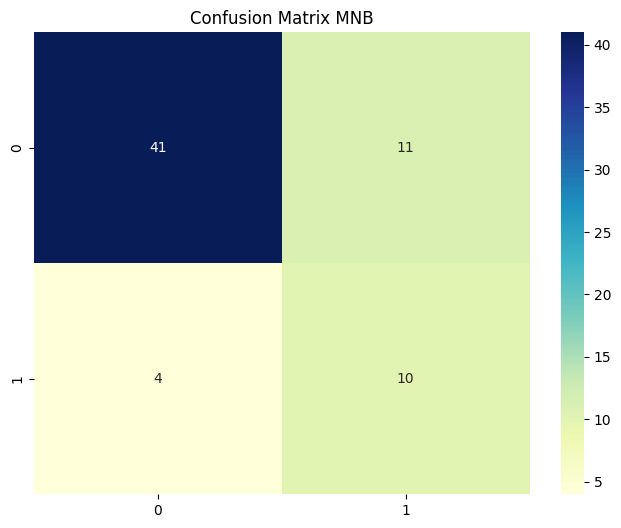

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_mnb, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix MNB')

In [ ]:
mnb.fit(X2_train, y2_train)

MultinomialNB()

In [ ]:
mnb2_pred = mnb.predict(X2_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X2_test.shape[0], (y2_test != mnb2_pred).sum()))

Number of mislabeled points out of a total 66 points : 15


In [ ]:
acc2_m = (y2_test == mnb2_pred).sum() / X2_test.shape[0]
print(acc2_m)

0.7727272727272727


In [ ]:
mnb.fit(X3_train, y3_train)

MultinomialNB()

In [ ]:
mnb3_pred = mnb.predict(X3_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X3_test.shape[0], (y3_test != mnb3_pred).sum()))

Number of mislabeled points out of a total 99 points : 29


In [ ]:
acc3_m = (y3_test == mnb3_pred).sum() / X3_test.shape[0]
print(acc3_m)

0.7070707070707071


--------------------------------------------------------------------------------

ใช้คลาส ComplementNB ในการเทรนโมเดล

ทำขั้นตอนเหมือนคลาสก่อนหน้าคือ

1. ใช้ 8 attribute
2.ลองตัดทีละ attribute
3.ใช้ชุดข้อมูลในการเทรนที่แตกต่างกัน

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
cnb = ComplementNB()

In [ ]:
cnb.fit(X1_train, y1_train)

ComplementNB()

In [ ]:
cnb1_pred = cnb.predict(X1_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X1_test.shape[0], (y1_test != cnb1_pred).sum()))

Number of mislabeled points out of a total 66 points : 15


In [ ]:
acc1_c = (y1_test == cnb1_pred).sum() / X1_test.shape[0]
print(acc1_c)

0.7727272727272727


In [ ]:
confusion_cnb = confusion_matrix( y1_test, cnb1_pred)
accuracy = accuracy_score(y1_test , cnb1_pred)
precision = precision_score(y1_test , cnb1_pred)
recall = recall_score(y1_test , cnb1_pred)
f1 = f1_score(y1_test, cnb1_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \
F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.7727, precision: 0.4762, recall: 0.7143, F1 score: 0.5714


Text(0.5, 1.0, 'Confusion Matrix CNB')

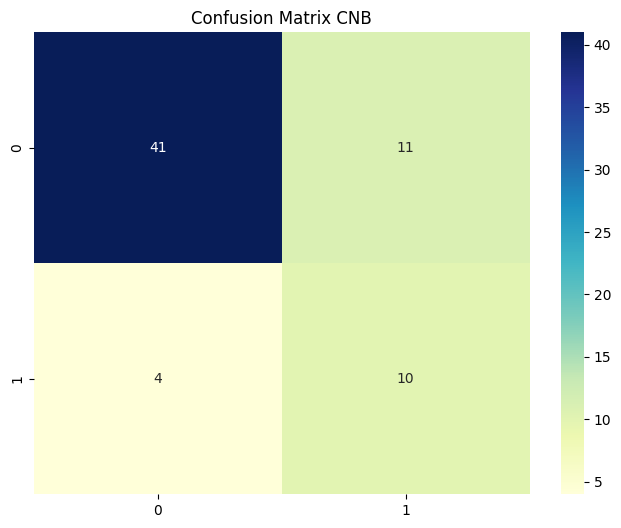

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_cnb, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix CNB')

In [ ]:
cnb.fit(X2_train, y2_train)

ComplementNB()

In [ ]:
cnb2_pred = cnb.predict(X2_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X2_test.shape[0], (y2_test != cnb2_pred).sum()))

Number of mislabeled points out of a total 66 points : 19


In [ ]:
acc2_c = (y2_test == cnb2_pred).sum() / X2_test.shape[0]
print(acc2_c)

0.7121212121212122


In [ ]:
cnb.fit(X3_train, y3_train)

ComplementNB()

In [ ]:
cnb3_pred = cnb.predict(X3_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X3_test.shape[0], (y3_test != cnb3_pred).sum()))

Number of mislabeled points out of a total 99 points : 29


In [ ]:
acc3_c = (y3_test == cnb3_pred).sum() / X3_test.shape[0]
print(acc3_c)

0.7070707070707071


--------------------------------------------------------------------------------

ใช้คลาส CategoricalNB ในการเทรนโมเดล

ทำขั้นตอนเหมือนคลาสก่อนหน้าคือ

1. ใช้ 8 attribute
2.ลองตัดทีละ attribute
3.ใช้ชุดข้อมูลในการเทรนที่แตกต่างกัน

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
canb = CategoricalNB()

In [ ]:
canb.fit(X1_train, y1_train)

CategoricalNB()

In [ ]:
canb1_pred = canb.predict(X1_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X1_test.shape[0], (y1_test != canb1_pred).sum()))

Number of mislabeled points out of a total 66 points : 9


In [ ]:
acc1_ca = (y1_test == canb1_pred).sum() / X1_test.shape[0]
print(acc1_ca)

0.8636363636363636


In [ ]:
confusion_canb = confusion_matrix( y1_test, canb1_pred)
accuracy = accuracy_score(y1_test , canb1_pred)
precision = precision_score(y1_test , canb1_pred)
recall = recall_score(y1_test , canb1_pred)
f1 = f1_score(y1_test, canb1_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \
F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8636, precision: 0.6667, recall: 0.7143, F1 score: 0.6897


Text(0.5, 1.0, 'Confusion Matrix CaNB')

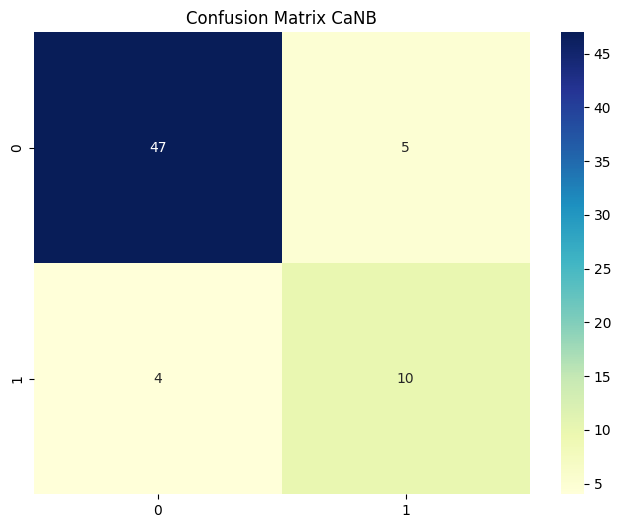

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_canb, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix CaNB')

In [ ]:
canb.fit(X2_train, y2_train)

CategoricalNB()

In [ ]:
canb2_pred = canb.predict(X2_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X2_test.shape[0], (y2_test != canb2_pred).sum()))

Number of mislabeled points out of a total 66 points : 12


In [ ]:
acc2_ca = (y2_test == canb2_pred).sum() / X2_test.shape[0]
print(acc2_ca)

0.8181818181818182


In [ ]:
canb.fit(X3_train, y3_train)

CategoricalNB()

In [ ]:
canb3_pred = canb.predict(X3_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X3_test.shape[0], (y3_test != canb3_pred).sum()))

Number of mislabeled points out of a total 99 points : 18


In [ ]:
acc3_ca = (y3_test == canb3_pred).sum() / X3_test.shape[0]
print(acc3_ca)

0.8181818181818182


--------------------------------------------------------------------------------

# สรุปผลค่า Accuracy ของแต่ละโมเดล ในแต่ละคลาสของ Naive Bayes

สรุปค่า Accuracy ของแต่ละโมเดลจากคลาสของ Navie Bayes



In [ ]:
data = {
    'Model': ['GaussianNB', 'BernoulliNB', 'MultinomialNB', 'ComplementNB', 'CategoricalNB'],
    'Accuracy1': [acc1_g, acc1_b, acc1_m, acc1_c, acc1_ca],
    'Accuracy2': [acc2_g, acc2_b, acc2_m, acc2_c, acc2_ca],
    'Accuracy3': [acc3_g, acc3_b, acc3_m, acc3_c, acc3_ca]
}

conclusion = pd.DataFrame(data)

sorted_accuracy = conclusion.sort_values(by='Accuracy1', ascending=False)
print(sorted_accuracy)

           Model  Accuracy1  Accuracy2  Accuracy3
4  CategoricalNB   0.863636   0.818182   0.818182
1    BernoulliNB   0.787879   0.787879   0.777778
2  MultinomialNB   0.772727   0.772727   0.707071
3   ComplementNB   0.772727   0.712121   0.707071
0     GaussianNB   0.742424   0.757576   0.777778


## จากข้อมูลแสดงให้เห็นว่า

**1.ค่า Accuracy ตอนที่ใช้ 8 และ ลดจำนวนของ attribute (ในทีนี้คือเหลือ 7 ) นั้นสามารถสรุปได้ว่า**

- โมเดล CategoricalNB, BernoulliNB, MultinomialNB, ComplementNB การที่เราตัด attribute ออกนั้นไม่ได้ทำให้ค่าเพิ่มขึ้นและบางอันทำให้ยังลดลงอีกด้วย ***ดังนั้นการตัดattributeออกนั้นไม่ได้มีความจำเป็นเพราะไม่ได้ทำให้ค่าดีขึ้น***

- โมเดล GaussianNB การที่เราตัด attribute นั้นทำให้ค่าเพิ่มขึ้น

**2.ค่า Accuracy ตอนเปลี่ยนสัดส่นข้อมูลที่ใช้เทรนโมเดลจาก 80% เป็น 70%**

- โมเดล CategoricalNB, BernoulliNB, MultinomialNB, ComplementNB เมื่อเราใช้ข้อมูล 70% ของข้อมูลเราไปเทรนโมเดล ทำให้ค่าลดลงจากตอนแรกที่เราใช้ข้อมูล 80 %ของข้อมูลในการเทรนโมเดล

***ดังนั้นการใช้ข้อมูลในจำนวนมากเทรนโมเดลจะทำให้ค่า accuracy ดีมากขึ้น***

- โมเดล  GaussianN การที่ใช้ข้อมูลในการเทรนโมดลลดลงทำให้ค่า Accuracy ดีมากขึ้น

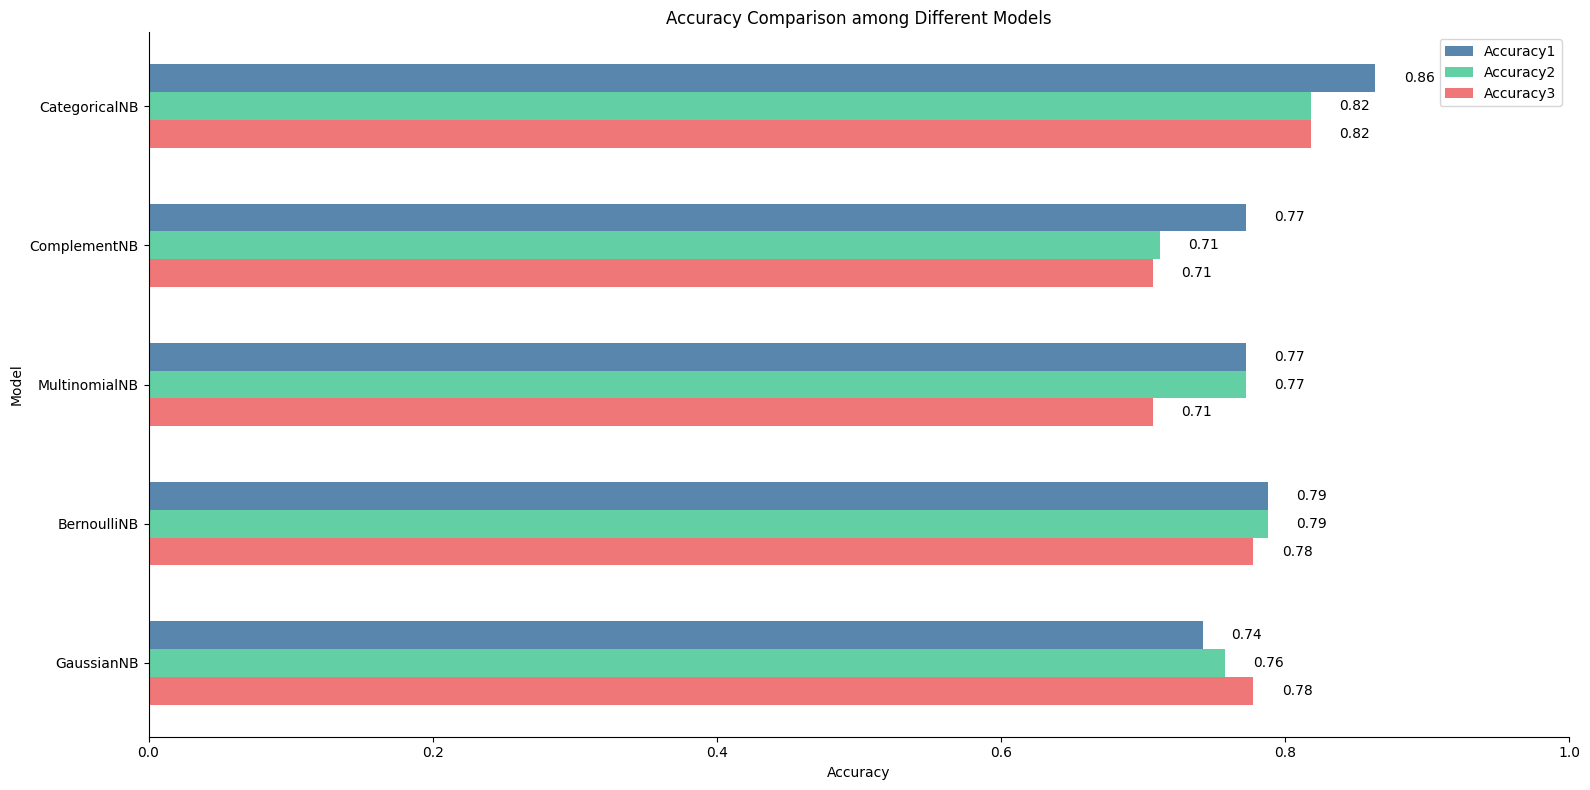

In [ ]:
original_data = {
    'Model': ['GaussianNB', 'BernoulliNB', 'MultinomialNB', 'ComplementNB', 'CategoricalNB'],
    'Accuracy1': [acc1_g, acc1_b, acc1_m, acc1_c, acc1_ca],
    'Accuracy2': [acc2_g, acc2_b, acc2_m, acc2_c, acc2_ca],
    'Accuracy3': [acc3_g, acc3_b, acc3_m, acc3_c, acc3_ca]
}
original_conclusion = pd.DataFrame(original_data)

x = np.arange(len(original_conclusion))

width = 0.2

plt.figure(figsize=(16, 8))
plt.barh(x + width, original_conclusion['Accuracy1'], height=width, color='#13538a', alpha=0.7, label='Accuracy1')
plt.barh(x, original_conclusion['Accuracy2'], height=width, color='#1fbb7f', alpha=0.7, label='Accuracy2')
plt.barh(x - width, original_conclusion['Accuracy3'], height=width, color='#ea3d3d', alpha=0.7, label='Accuracy3')

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison among Different Models')
plt.yticks(x, original_conclusion['Model'])

offset = 0.02
for i in range(len(original_conclusion)):
    plt.text(original_conclusion['Accuracy1'][i] + offset, x[i] + width, f'{original_conclusion["Accuracy1"][i]:.2f}', ha='left', va='center')
    plt.text(original_conclusion['Accuracy2'][i] + offset, x[i], f'{original_conclusion["Accuracy2"][i]:.2f}', ha='left', va='center')
    plt.text(original_conclusion['Accuracy3'][i] + offset, x[i] - width, f'{original_conclusion["Accuracy3"][i]:.2f}', ha='left', va='center')

plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------

# สรุปผลค่า Accuracy ของแต่ละโมเดลจากคลาสอื่นๆ นอกจาก Navie Bayes

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

results1 = {}
for name, model in models.items():
    model.fit(X1_train, y1_train)
    y_pred = model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    results1[name] = accuracy

results2 = {}
for name, model in models.items():
    model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)
    accuracy = accuracy_score(y2_test, y_pred)
    results2[name] = accuracy

results3 = {}
for name, model in models.items():
    model.fit(X3_train, y3_train)
    y_pred = model.predict(X3_test)
    accuracy = accuracy_score(y3_test, y_pred)
    results3[name] = accuracy

results_df1 = pd.DataFrame(results1.items(), columns=['Model', 'Accuracy1'])
results_df2 = pd.DataFrame(results2.items(), columns=['Model', 'Accuracy2'])
results_df3 = pd.DataFrame(results3.items(), columns=['Model', 'Accuracy3'])

merged_results_df = results_df1.merge(results_df2, on='Model').merge(results_df3, on='Model')

sorted_results_df = merged_results_df.sort_values(by='Accuracy1', ascending=False)

print(sorted_results_df)

                 Model  Accuracy1  Accuracy2  Accuracy3
2  Logistic Regression   0.893939   0.893939   0.848485
1                  SVM   0.878788   0.878788   0.888889
0        Random Forest   0.833333   0.863636   0.797980
3  K-Nearest Neighbors   0.803030   0.848485   0.777778
4        Decision Tree   0.757576   0.772727   0.808081


## จากข้อมูลแสดงให้เห็นว่า

**1.ค่า Accuracy ตอนที่ใช้ 8 และ ลดจำนวนของ attribute (ในทีนี้คือเหลือ 7 ) นั้นสามารถสรุปได้ว่า**
- โมเดล Random Forest, SVM และ Logistic Regression ค่า Accuracy ออกมาไม่ต่างกันจากไม่ตัด Attributes ออก
- โมเดล K-Nearest Neighbors และ Decision Tree ค่า Accuracy เพิ่มขึ้นจากเดิม


**2.ค่า Accuracy ตอนเปลี่ยนสัดส่วนข้อมูลที่ใช้เทรนโมเดลจาก 80% เป็น 70%**
- โมเดล Random Forest, SVM, Logistic Regression และ K-Nearest Neighbors ค่า Accuracy ลดลง
- โมเดล SVM และ Decision Tree ค่า Accuracy เพื่มขึ้น

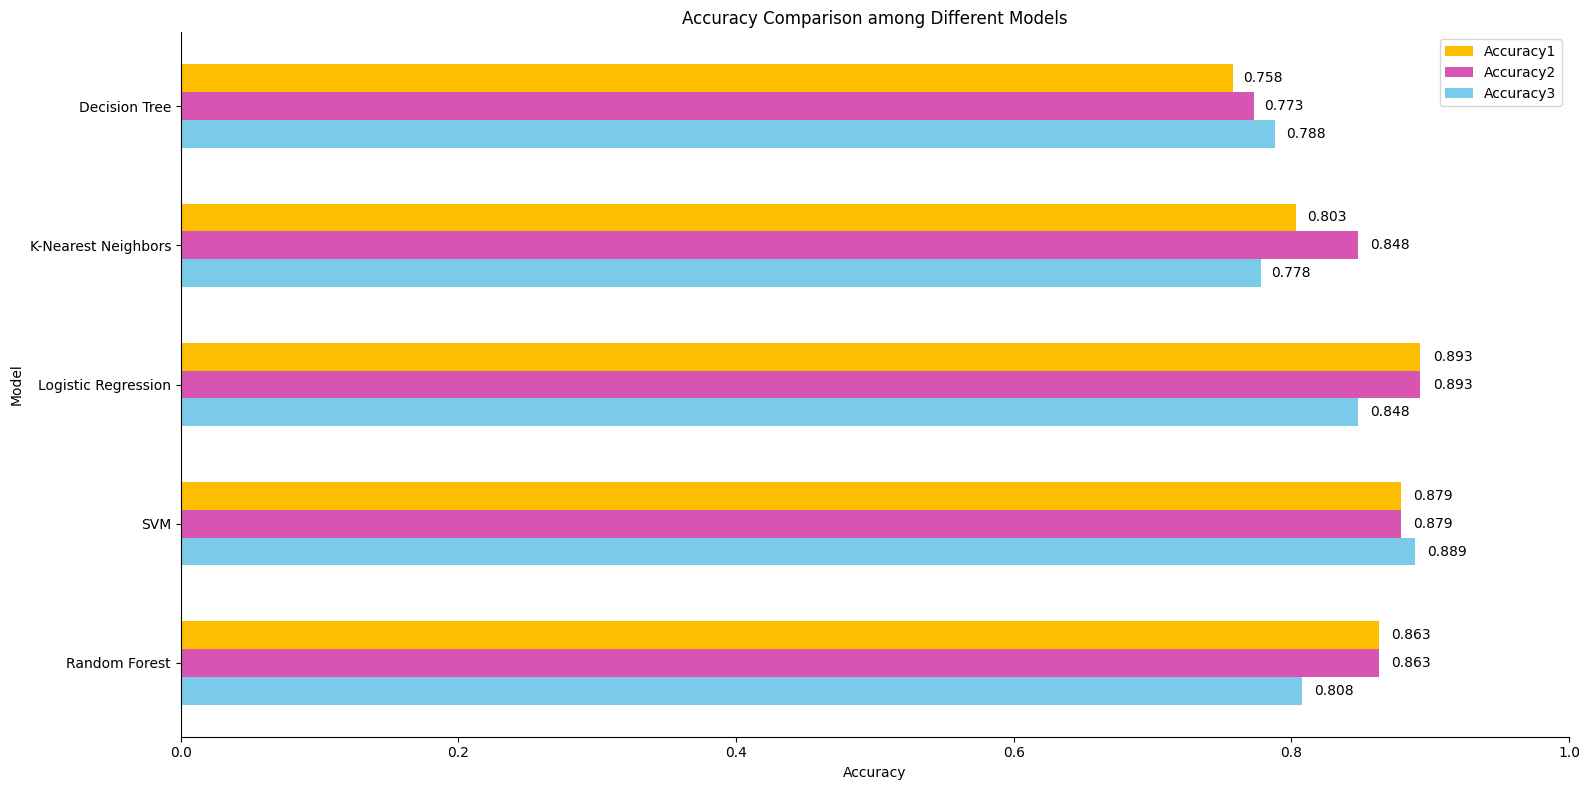

In [ ]:
# Data for the sorted results
sorted_results_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Accuracy1': [0.863, 0.879, 0.893, 0.803, 0.758],
    'Accuracy2': [0.863, 0.879, 0.893, 0.848, 0.773],
    'Accuracy3': [0.808, 0.889, 0.848, 0.778, 0.788]
})

# Set the positions for the bars
y = list(range(len(sorted_results_df)))

# Set the height of the bars
height = 0.2

colors = ['#7acbea', '#d754b3', '#febe00']

# Plot bars
plt.figure(figsize=(16, 8))ผ
for i, col in enumerate(['Accuracy3', 'Accuracy2', 'Accuracy1']):
    bars = plt.barh([pos + i*height for pos in y], sorted_results_df[col], height=height, label=col, color=colors[i])
    for bar in bars:
        plt.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', va='center')

# Add labels
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison among Different Models')

# Customize legend order
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0]  # Accuracy1, Accuracy2, Accuracy3
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper right', bbox_to_anchor=(1.0, 1.0))

plt.yticks([pos + height for pos in y], sorted_results_df['Model'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlim(0.0, 1.0)
plt.tight_layout()
plt.show()


In [ ]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X1_train, y1_train)
LR_pred = LR.predict(X1_test)

In [ ]:
confusion_LR = confusion_matrix( y1_test, LR_pred)
accuracy = accuracy_score(y1_test , LR_pred)
precision = precision_score(y1_test , LR_pred)
recall = recall_score(y1_test , LR_pred)
f1 = f1_score(y1_test, LR_pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \
F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8939, precision: 0.7692, recall: 0.7143, F1 score: 0.7407


Text(0.5, 1.0, 'Confusion Matrix LR')

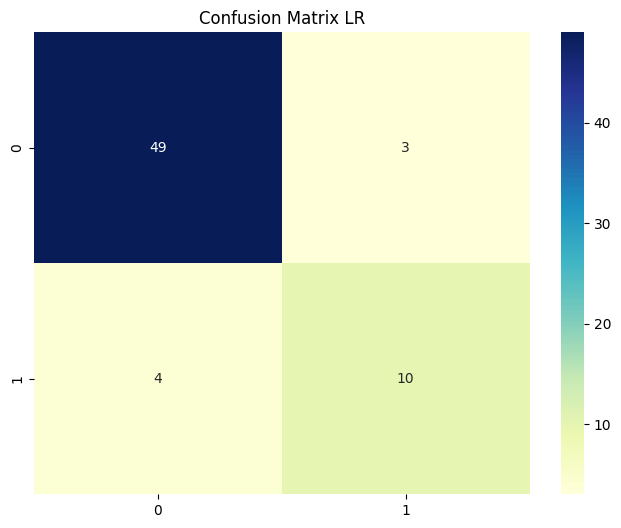

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_LR, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix LR')

# สรุปค่าการใช้Metrics(Accuracy,Precision,Recall,F1 score)ในการวัดแต่ละโมเดล

In [ ]:
classifiers = {
    'GNB': gnb1_pred,
    'BNB': bnb1_pred,
    'MNB': mnb1_pred,
    'GNB': gnb1_pred,
    'CNB': cnb1_pred,
    'CANB': canb1_pred,
    'LR': LR_pred
}

classifier_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for classifier_name, classifier_pred in classifiers.items():
    accuracy = accuracy_score(y1_test, classifier_pred)
    precision = precision_score(y1_test, classifier_pred)
    recall = recall_score(y1_test, classifier_pred)
    f1 = f1_score(y1_test, classifier_pred)

    classifier_names.append(classifier_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

metrics_data = {
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}
metrics_df = pd.DataFrame(metrics_data)
sorted__df = metrics_df.sort_values(by='Accuracy', ascending=False)

print(sorted__df, '\n')

  Classifier  Accuracy  Precision    Recall  F1 Score
5         LR  0.893939   0.769231  0.714286  0.740741
4       CANB  0.863636   0.666667  0.714286  0.689655
1        BNB  0.787879   0.000000  0.000000  0.000000
2        MNB  0.772727   0.476190  0.714286  0.571429
3        CNB  0.772727   0.476190  0.714286  0.571429
0        GNB  0.742424   0.434783  0.714286  0.540541 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


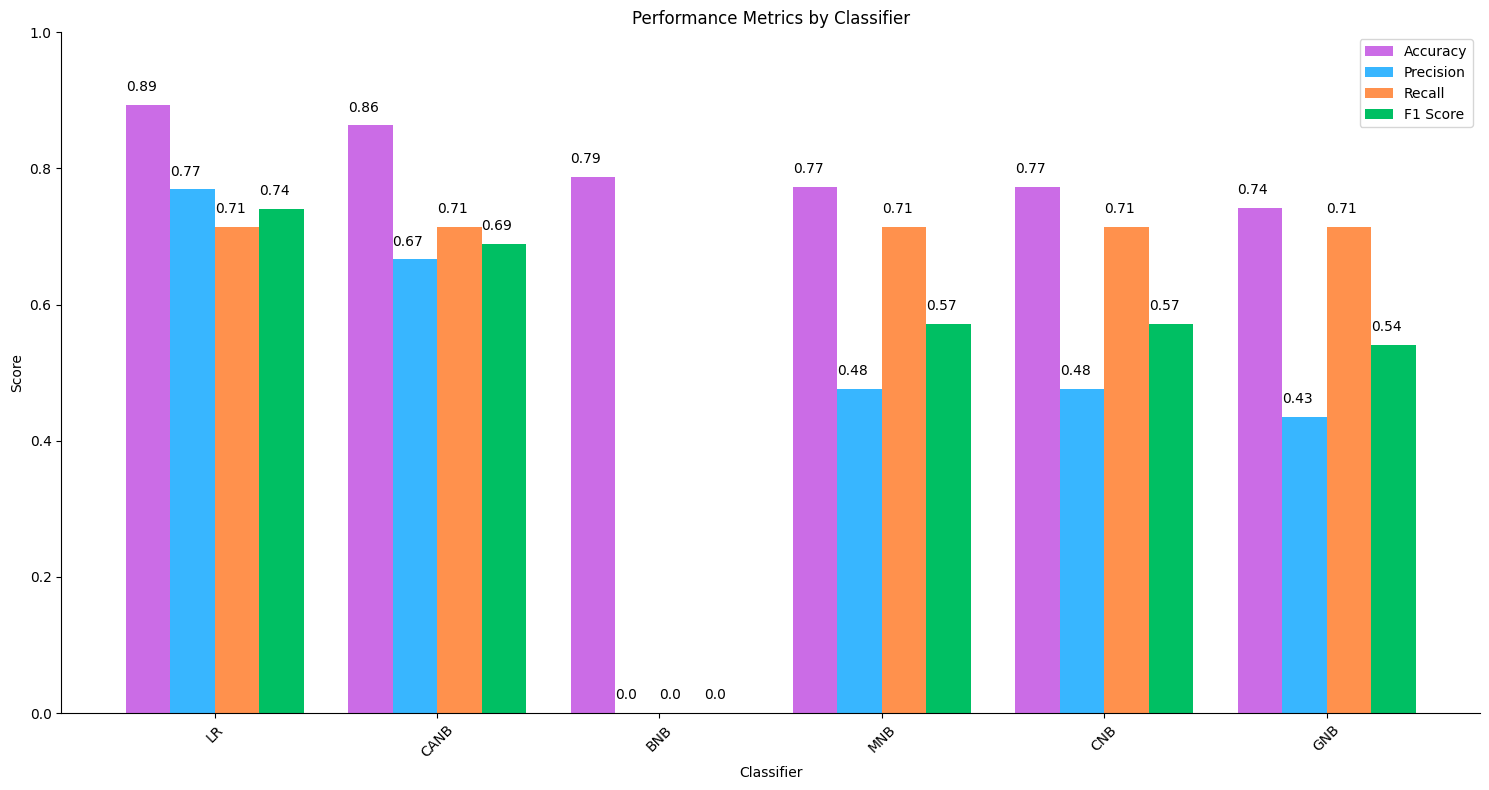

In [ ]:

plt.figure(figsize=(15, 8))

num_classifiers = len(sorted__df)

bar_width = 0.2

index = np.arange(num_classifiers)

plt.bar(index, sorted__df['Accuracy'], color='#cb6ce6', width=bar_width, label='Accuracy')

plt.bar(index + bar_width, sorted__df['Precision'], color='#38b6ff', width=bar_width, label='Precision')

plt.bar(index + 2 * bar_width, sorted__df['Recall'], color='#ff914d', width=bar_width, label='Recall')

plt.bar(index + 3 * bar_width, sorted__df['F1 Score'], color='#00bf63', width=bar_width, label='F1 Score')

plt.title('Performance Metrics by Classifier')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(index + 1.5 * bar_width, sorted__df['Classifier'], rotation=45)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0.0, 1.0)
plt.tight_layout()

for i in range(num_classifiers):
    plt.text(index[i] - 0.1, sorted__df.iloc[i]['Accuracy'] + 0.02, str(round(sorted__df.iloc[i]['Accuracy'], 2)), fontsize=10, color='black')
    plt.text(index[i] + bar_width - 0.1, sorted__df.iloc[i]['Precision'] + 0.02, str(round(sorted__df.iloc[i]['Precision'], 2)), fontsize=10, color='black')
    plt.text(index[i] + 2 * bar_width - 0.1, sorted__df.iloc[i]['Recall'] + 0.02, str(round(sorted__df.iloc[i]['Recall'], 2)), fontsize=10, color='black')
    plt.text(index[i] + 3 * bar_width - 0.1, sorted__df.iloc[i]['F1 Score'] + 0.02, str(round(sorted__df.iloc[i]['F1 Score'], 2)), fontsize=10, color='black')

plt.show()


# สรุปผล
1.***Logistic regression เป็นโมเดลที่มีประสิทธิภาพมากที่สุด***

โดยเราสามารถดูได้จากค่า Accuracy, Precision, Recall, F1 Score ที่ไม่ว่าเราจะใช้ Metrics ใด ๆ ในการวัดผลของโมเดลLogistic regression ก็จะสูงที่สุด

**2.logistic regression เป็นโมเดลที่เหมาะกับ Data set ของเรามากที่สุด**

เพราะ Target ของ Logistic Regression คือเกิดเหตุการณ์และไม่เกิดเหตุการณ์ซึ่งสามารถจัดอยู่ในประเภท Binary Classification ในที่นี้คือทำนายว่า เป็น หรือ ไม่เป็น โรคเบาหวาน

***สรุป Logistic regression เป็นโมเดลที่มีประสิทธิภาพมากที่สุดและเหมาะกับdata set ของเรามากที่สุด***


**3.โมเดล CategoricalNB มีค่าความแม่นยำมากที่สุด**

อาจเพราะ Outcome แยกชัดเจนเป็น 2 อย่างคือ 1 หมายถึงมีเบาหวานและ 0 หมายถึงไม่มีเบาหวาน ซึ่งทำให้ข้อมูลเป็นข้อมูลหมวดหมู่ (categorical data) เนื่องจาก Outcome เป็นตัวแปรที่เป็นแบบจำนวนเต็มและเฉพาะค่า 0 หรือ 1 เท่านั้น ดังนั้นโมเดลที่เหมาะสมที่สุดสำหรับข้อมูลนี้คือโมเดล Categorical Naive Bayes ซึ่งเหมาะสำหรับการจำแนกประเภทของข้อมูลที่เป็นหมวดหมู่ได้ดีที่สุด และ CategoricalNB เหมาะกับข้อมูลที่มีการกระจายตัวแบบไม่ต่อเนื่อง

**4.โมเดล BernoulliNB ไม่น่าเชื่อถือ**

เพราะ ค่า Preciion, Recall และ F1 Score เป็น 0

ค่า Outcome ของข้อมูล test ของเราส่วนมากเท่ากับ 0 โมเดลนี้มีค่าทำนายออกมาเป็น 0 อย่างเดียว แสดงว่าหาก ค่า Outcome ของข้อมูล test ของเรามีค่า 1 เพิ่มมากขึ้นก็จะเท่ากับว่าค่า Accuracy สามารถลดลง การวัดต่าง ๆ จึงไม่สามารถวัดประสิทธิภาพของโมเดลนี้ได้


**5.ค่า Recall ของโมเดลทั้งหมด (ยกเว้น BernoulliNB) มีค่าเท่ากันอยู่ที่ 71.0**

แสดงว่าโมเดลเหล่านี้ทำนายคนที่เป็นเบาหวานได้ถูกต้องเท่ากัน
